In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [2]:
# Read the csv data as a DataFrame
df = pd.read_csv('./telescope_data.csv', index_col=0)

# Remove null and na values
df.dropna()

df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [3]:
# Task 2: Extract class column.
# ---------------
#Extract the class classes
classes = df['class']
data_matrix = df.drop(columns='class')

data_matrix


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


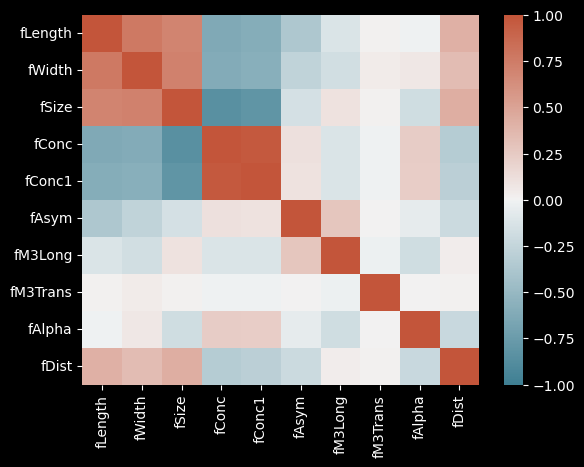

In [4]:
# Task 3: Create a correlation matrix.
# ---------------

correlation_matrix = data_matrix.corr()

# Heatmap code:
red_blue = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation_matrix, vmin = -1, vmax = 1, cmap=red_blue)
plt.show()




In [5]:
# Task 4: Perform eigendecomposition.

# Perform eigendecomposition using `np.linalg.eig` 
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print(f'Eigenvalues length: {eigenvalues.size}, Original Number of Features: {data_matrix.shape[1]}')

# Order the eigenvalues by ordering the indices of the eigenvalues using `argsort`, and use [::-1] to order them from greatest to smallest
indices = eigenvalues.argsort()[::-1]  
eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[:, indices]

print(eigenvalues.shape, eigenvectors.shape)

Eigenvalues length: 10, Original Number of Features: 10
(10,) (10, 10)


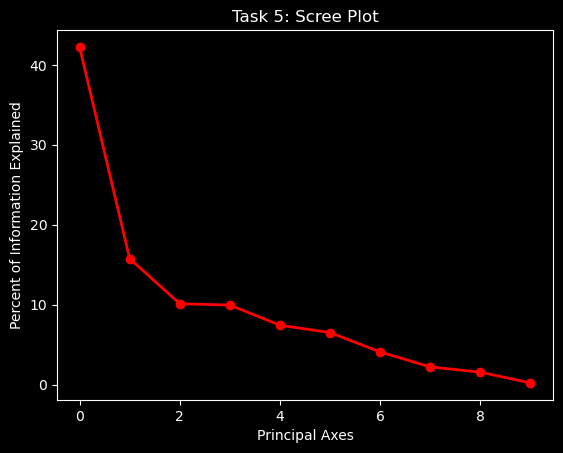

In [6]:
#Task 5: Find the variance/information percentages for each eigenvalue.
#Find the percentages of information for each eigenvector, which is generated by the proportion of its eigenvalues to the sum of all eigenvalues
information_proportions = eigenvalues / eigenvalues.sum()
information_percents = information_proportions * 100

#Plot the principal axes vs the information proportions for each principal axis
plt.figure()
plt.plot(information_percents, 'ro-', linewidth=2)
plt.title('Task 5: Scree Plot')
plt.xlabel('Principal Axes')
plt.ylabel('Percent of Information Explained')
plt.show()

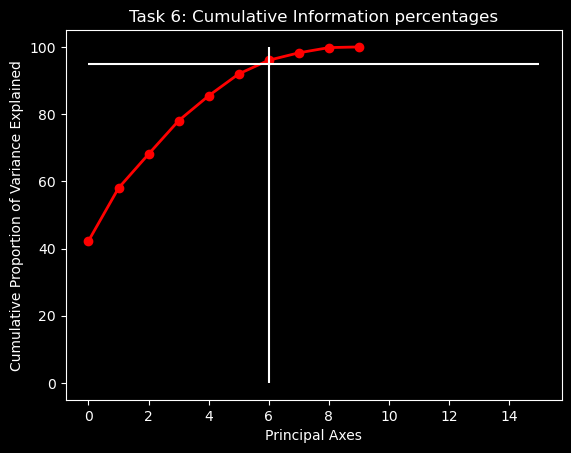

In [7]:
# Task 6: Find the cumulative variance/information percentages for each eigenvalue.
# ---------------
# Find the cumulative sum of the percentages
cumulative_information_percents = np.cumsum(information_percents)

# Plot the cumulative percentages array
plt.figure()
plt.plot(cumulative_information_percents, 'ro-', linewidth=2)

# Also plot a horizontal line indicating the 95% mark, and a vertical line for the third principal axis
plt.hlines(y=95, xmin=0, xmax=15)
plt.vlines(x=6, ymin=0, ymax=100)
plt.title('Task 6: Cumulative Information percentages')
plt.xlabel('Principal Axes')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()

In [8]:
# Scale the data for PCA
scaler = StandardScaler()
standardized_matrix = scaler.fit_transform(data_matrix)

In [9]:
# Create PCA model
pca = PCA(n_components=6)
pca_array1 = pca.fit_transform(standardized_matrix)

# Calculate eigenvalues and extract eigenvectors
eigenvalues = (pca.singular_values_)**2 # eigenvalues are the square of the singular_values
eigenvectors = pca.components_

# extract variance rations
variance_ratios = pca.explained_variance_ratio_

print(f'eigenvalues: {eigenvalues}')
print(f'variance_ratios: {variance_ratios}')

eigenvalues: [80340.30690683 29960.07388966 19244.53718501 18906.12150422
 14113.20887768 12364.64460805]
variance_ratios: [0.42239909 0.15751879 0.10118053 0.09940127 0.07420194 0.06500865]


In [10]:
# Create PCA model with 2 components
pca = PCA(n_components=2)
pca_array2 = pca.fit_transform(standardized_matrix)

# Calculate eigenvalues and extract eigenvectors
eigenvalues = (pca.singular_values_)**2 # eigenvalues are the square of the singular_values
eigenvectors = pca.components_

# extract variance rations
variance_ratios = pca.explained_variance_ratio_

print(f'eigenvalues: {eigenvalues}')
print(f'variance_ratios: {variance_ratios}')


eigenvalues: [80340.30690683 29960.07388966]
variance_ratios: [0.42239909 0.15751879]


In [11]:
pca_array2[:,1]

array([-0.36925645, -0.54922547,  1.8313162 , ..., -0.49118566,
        2.31055878,  4.76432253])

c:\Users\matth\anaconda3\envs\tryba-env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


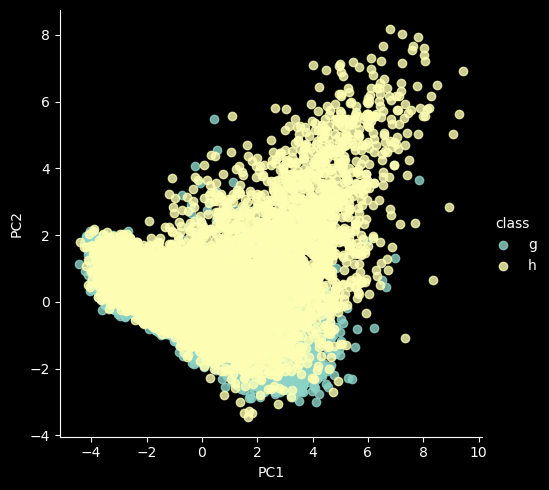

In [12]:
principal_components_data = pd.DataFrame({
    'PC1': pca_array1[:, 0],
    'PC2': pca_array2[:, 1],
    'class': classes,
})

sns.lmplot(x='PC1', y='PC2', data=principal_components_data, hue='class', fit_reg=False)
plt.show()

In [23]:
#split the data using pca_array1 as X
X_train, X_test, y_train, y_test = train_test_split(pca_array1, classes, test_size=0.2, random_state=42)

# Create SVC Model
svc_1 = svm.SVC(kernel='linear', C=1)

svc_1.fit(X_train, y_train)

accuracy = accuracy_score(y_test, svc_1.predict(X_test))
print(f'The accuracy using a linear SVC on pca_array1 (using 6 features) is: {accuracy}')

The accuracy using a linear SVC on pca_array1 (using 6 features) is: 0.7854889589905363


In [24]:
#split the data using pca_array1 as X
X_train, X_test, y_train, y_test = train_test_split(pca_array2, classes, test_size=0.2, random_state=42)

# Create SVC Model
svc_2 = svm.SVC(kernel='linear', C=1)

svc_2.fit(X_train, y_train)

accuracy = accuracy_score(y_test, svc_2.predict(X_test))
print(f'The accuracy using a linear SVC on pca_array2 (using 2 features) is: {accuracy}')

The accuracy using a linear SVC on pca_array2 (using 2 features) is: 0.7360672975814931


In [27]:
# Hyperparameter Tuning of SVC Model

#split the data using pca_array1 as X
X_train, X_test, y_train, y_test = train_test_split(pca_array1, classes, test_size=0.2, random_state=42)

# Create dictionary of parameters
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [32]:
# Run Model with new best_estimator

svc = clf.best_estimator_

svc.fit(X_train, y_train)
accuracy = accuracy_score(y_test, svc.predict(X_test))
accuracy

0.8259726603575184